In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import joblib


In [4]:
# Read dataset
df = pd.read_csv('heart_2020_cleaned.csv')
print("First 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nMissing values:")
print(df.isnull().sum())

First 5 rows:
  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        

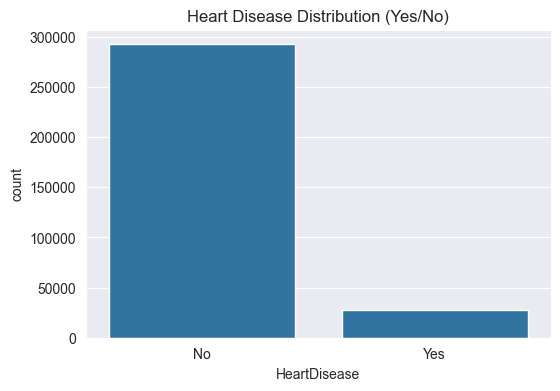

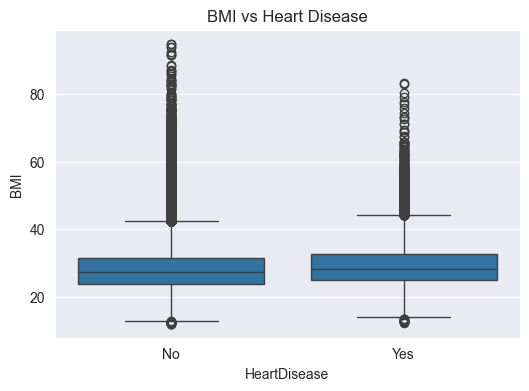

In [5]:
# Plot HeartDisease distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='HeartDisease', data=df)
plt.title('Heart Disease Distribution (Yes/No)')
plt.show()

# Plot BMI vs HeartDisease
plt.figure(figsize=(6, 4))
sns.boxplot(x='HeartDisease', y='BMI', data=df)
plt.title('BMI vs Heart Disease')
plt.show()

In [6]:
# One-Hot Encoding for categorical columns
categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
                      'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
                      'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Convert HeartDisease to 0/1
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# Split features and target
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Train data shape: (255836, 37)
Test data shape: (63959, 37)



Model Results:
               Accuracy  Precision    Recall  F1-Score
Decision Tree  0.862052   0.230795  0.247675  0.238937
Random Forest  0.903032   0.344546  0.120887  0.178978


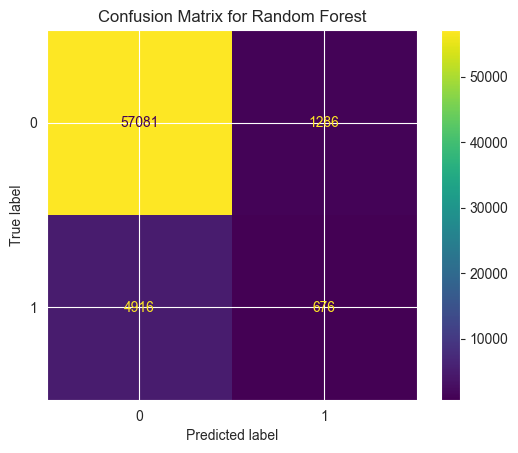

In [7]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluation function
def evaluate_model(y_test, pred):
    return {
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred)
    }

# Print results
dt_results = evaluate_model(y_test, dt_pred)
rf_results = evaluate_model(y_test, rf_pred)
results_df = pd.DataFrame([dt_results, rf_results], index=['Decision Tree', 'Random Forest'])
print("\nModel Results:")
print(results_df)

# Plot Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, rf_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [8]:
# Save the Random Forest model
joblib.dump(rf_model, 'heart_model.pkl')
print("Model saved as heart_model.pkl")

Model saved as heart_model.pkl
